# Project: Investigate a Dataset (The Movie Database (TMDb))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This is the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.

This database contains the following features:-

- movie_id - A unique identifier for each movie.
- imdb_id - A unique identifier for each movie on IMDB.
- cast - The name of lead and supporting actors.
- director - the director of the movie
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- tagline - Movie's tagline.
- vote_average - average ratings the movie recieved.
- budget_adj - shows the budget associated movie in terms of 2010 dollars.
- revenue_adj - shows the revenue associated movie in terms of 2010 dollars.

Contain:

<p>Total Rows = 10866<br>
Total Columns = 21 <p>

**Questions**<br>
1- What is the movie that make max and min profit ?<br>
2- What is the effect of run time on profit of movies? <br>
3- what the impact of popularity on the profit? <br>
4- what the impact of budget on the profit?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd                #import pandas 
import numpy as np                 #import numpy
import matplotlib.pyplot as plt    #import matplotlib
import seaborn as sns              #import seaborn 
#inline matplotlib
%matplotlib inline                 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# open data csv file
df = pd.read_csv('tmdb-movies.csv')  #read data as df dataframe
df.head()                            #get the first 5 column of df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()               # get describe of df

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- Notes from describe function: <br>
1- this dataset contain films that produced from 1960 to 2015.<br>
2- the run time of films from 1.30 to 1.85 hr.<br>
3- budget_adj, revenue_adj in term 2010 dollars are equivalent to budget, revenue, so we can drop budget, venenue columns <br>
4-we will use imdb_id as key for movies so , id columns may be removed<br>
5- columns: run_time, budget_adj, revenue_ adj min value fot it equal to zeros, study it may be droped or replace by mean

In [4]:
df.info()               #get info of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- Notes from info function:<br>
1- homepage: contain a alot of null value, so need to drop<br>
2- tagline: contain a null values, and may be need to drop<br>
3- keywords, overview may be droped

In [5]:
df.dtypes               #get the dtypes of columns of df

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**convert release_date and release_year to datetime dtype**

In [6]:
df.duplicated().sum()           #get the sum of the duplicate rows

1

In [7]:
df.isnull().sum()              #check the sum of null value in columns of df

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

- Null values: <br>
1- homepage, tagline, keywords contain  a large number of null value, so thats columns may be drop.<br>
2- cast, genres, production_company columns contain null value that may be droped<br>
3- no of duplicate in dataset is 1

In [8]:
df.runtime[df['runtime'] == 0].shape # check the runtime with zero values

(31,)

**runtime with value equal to zero may be replaced by mode value**

In [9]:
df.budget_adj[df['budget_adj'] == 0].shape # check the budget_adj with zero values

(5696,)

In [10]:
df.revenue_adj[df['revenue_adj'] == 0].shape #check the revenue_adj with zero values

(6016,)

**budget_adj and revenue_adj with values equal to zero may be droped or replaced by mean value**

### Data Cleaning
- steps: <br>
1- drop unwanted columns<br>
2- drop duplicated values<br>
3- drop null value from rows<br>
4- replace rows with runtime equal to zero by using runtime mode value<br>
5- replace rows with budjet_adj and revenue_adj with values zero by mean<br>
6- convert release_date and release_year to timedate dtype

In [11]:
# drop unwanted columns
droped_columns = ['id','budget', 'revenue','homepage', 'tagline','keywords', 'overview'] #column names list for drop perpose
df.drop(columns=droped_columns, axis=1, inplace=True)      #drop the unwanted columns 

In [12]:
df.drop_duplicates(inplace=True)   # drop duplucate rows

In [13]:
df.isnull().sum()                  # check null values after drop unwanted columns

imdb_id                   10
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
df.shape                           #get the shape of df

(10865, 14)

In [15]:
# fill runtime equal to 0 with mode
runtime_mode = df.runtime.mode()        #get the mode of runtime value
df.runtime.fillna(axis=0, value=runtime_mode, inplace=True) #fill nan value with runtime mode value

In [16]:
# fill budget_adj mean
budget_adj_mean = df.budget_adj.mean() # get the budget_adj mean
df.budget_adj.replace({0: np.NaN}, inplace=True) # replace zero values to nan to replace with the mean
df.budget_adj.fillna(axis=0, value=budget_adj_mean, inplace=True) #replace nan value with the mean

# fill revenue_adj mean
revenue_adj_mean = df.revenue_adj.mean() # get the budget_adj mean
df.revenue_adj.replace({0: np.NaN}, inplace=True) # replace zero values to nan to replace with the mean
df.revenue_adj.fillna(axis=0, value=revenue_adj_mean, inplace=True) #replace nan value with the mean

In [17]:
df.budget_adj.describe()

count    1.086500e+04
mean     2.675046e+07
std      3.051007e+07
min      9.210911e-01
25%      1.754989e+07
50%      1.754989e+07
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [18]:
df.dropna(axis=0, inplace=True )  #drop nan values in rows inplace 

In [19]:
df.isnull().sum()   #check the sum of null value after drop nan

imdb_id                 0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [20]:
df.dtypes       #get the dtypes of columns of df

imdb_id                  object
popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [21]:
df.to_csv('data_v01.csv', index=False)   # Sace the clean version of data

<a id='eda'></a>
## Exploratory Data Analysis

#### Utitlity Functions:

In [22]:
# Function used for extract data from column contain multi element
def extract_data(df,column,sep="|"):
    '''
        Function for split and explode column data 
        ex: act|Drama|Action
        input:
            df : DataFrame name as DataFrame object
            column: column name as string object
        out:
            return a dataframe object contain the split and explode data        
    '''
    
    
    # using new temporary column used to save extracted data from column need to splits
    df_out = df.assign(col_temp=df[column].str.split(sep))
    df_out = df_out.explode(df_out.col_temp.name) 

    # drop the input column
    df_out.drop(column, axis=1, inplace=True)

    #rename temporary column to input column name
    df_out.rename(columns={'col_temp': column}, inplace=True)
    
    #retrun DataFrame
    return df_out

In [23]:
def myReqPlot(df, xVal, yVal, xUnit='', yUnit='', scatter_color='blue', line_color='red',**args):
    '''
    Function used for ploting of data by using RegPlot in seaborn package 
    input:
        df: DataFrame of Data
        xVal: independet column name, string object
        yVal: dependent column name, string object
        color: color of Regression line
        marker:Marker to use for the scatterplot
    output:
        Plot of linear regression model fit
    '''
    #set plot dimension
    plt.figure(figsize=[10,8])
    #plot
    sns.regplot(data=df,x=xVal,y=yVal,line_kws={'color': line_color},color=scatter_color,**args);
    
    #optinal 
    xVar = xVal.replace('_', ' ') #replace _ with space
    yVar = yVal.replace('_', ' ') #replace _ with space
    # Add Title and format it
    plt.title(f'Relationship between {yVal} and {xVal}'.title(),fontsize=14, weight="bold")
    
    # Add x label and format it
    plt.xlabel(f'{xVal} {xUnit}'.title() ,fontsize = 10, weight='bold')
    
    # Add x label and format it
    plt.ylabel(f'{yVal} {yUnit}'.title() ,fontsize = 10, weight='bold')

In [24]:
def myPlot(df, xVar, yVar, xUnit='', yUnit='',kind='bar', color='blue',**args):
    '''
    Function used for ploting of data  
    input:
        df: DataFrame of Data
        xVal: independet column name, string object
        yVal: dependent column name, string object
        kind: kind of plotting
        color: color of bar
    output:
        Plot of Bar Plot
    '''
    
    
    #set plot dimension
    #plt.figure(figsize=(18,4))
    #plot
    
    df.plot(x=xVar,y=yVar, kind=kind,color=color,figsize=(10,4),**args);

    #optinal 
    xVar = xVar.replace('_', ' ') #replace _ with space
    yVar = yVar.replace('_', ' ') #replace _ with space

    # Add Title and format it
    plt.title(f'Relationship between {yVar} and {xVar}'.title(),fontsize=14, weight="bold")
    
    if kind == 'barh':
        #reverse x and y label
        plt.xlabel(f'{yVar} {yUnit}'.title() ,fontsize = 10, weight='bold') # Add x label and format it
        plt.ylabel(f'{xVar} {xUnit}'.title() ,fontsize = 10, weight='bold') # Add x label and format it

    else:
        #use normal label
        plt.xlabel(f'{xVar} {xUnit}'.title() ,fontsize = 10, weight='bold') # Add x label and format it
        plt.ylabel(f'{yVar} {yUnit}'.title() ,fontsize = 10, weight='bold')  # Add x label and format it


In [25]:
def myHist(df,xLabel='', yLabel='', title='',bins =40, color='blue',**args):
    '''
    Function used for histogram ploting of data  
    input:
        df: DataFrame of Data
        xLabel: x label
        yLabel: y label
        title: title of plotting
        bins: no of bins of histogram
        color: color of histogram
    output:
        Plot of Histogram Plot
    '''
    
    #plot
    df.hist(figsize = (10,4), bins =40,color=color,**args);

    # Add Title and format it
    plt.title(title.title(),fontsize=14, weight="bold")

    plt.xlabel(xLabel.title() ,fontsize = 10, weight='bold') # Add x label and format it
    plt.ylabel(yLabel.title() ,fontsize = 10, weight='bold')  # Add x label and format it

#### load the clean data 

In [26]:
df= pd.read_csv('data_v01.csv') #load the clean version of datafram
df.head(2)                      #load first 2 rows

,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [27]:
df.dtypes       #check the dtype of columns

imdb_id                  object
popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [28]:
#convert release_date and release_year to datetime dtype datetime64[ns]
df.release_date = df.release_date.astype('datetime64[ns]') #convert release_date to datetime dtype datetime64[ns]
df.release_year = df.release_year.astype('datetime64[ns]') #convert release_year to datetime dtype datetime64[ns]

### Q 1. What is the movie that make max and min profit ?

In [29]:
# Create new column for the profit
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(1)            #get the first column

,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,1.254446e+09


In [30]:
df[df.profit == df.profit.max()].original_title     # find movie name that make maximum profit

1193    Star Wars
Name: original_title, dtype: object

In [31]:
df[df.profit == df.profit.min()].original_title     # find movie name that make minimum profit

2030    The Warrior's Way
Name: original_title, dtype: object

In [32]:
df[df.budget_adj == df.budget_adj.max()].original_title # find movie name that has maximum budget

2030    The Warrior's Way
Name: original_title, dtype: object

In [33]:
df[df.runtime == df.runtime.max()].original_title       # find movie name that has minimum budget

3588    Taken
Name: original_title, dtype: object

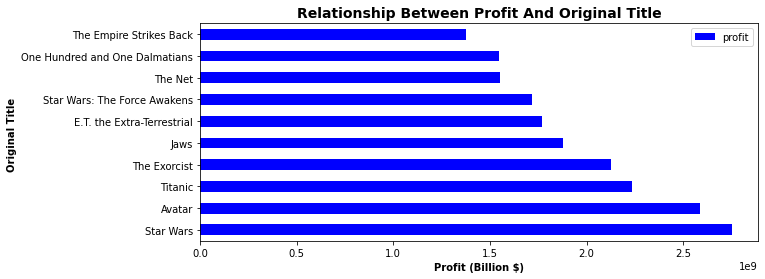

In [34]:
sorted_profit = df['profit'].sort_values(ascending=False)[:10] #filter of the profite with sorting 
df_profit_sorted = df.iloc[sorted_profit.index]    #get the data by apply sort function
myPlot(df_profit_sorted,'original_title', 'profit','', '(billion $)', kind='barh' ) #plot the data by using myPlot function with barh kind

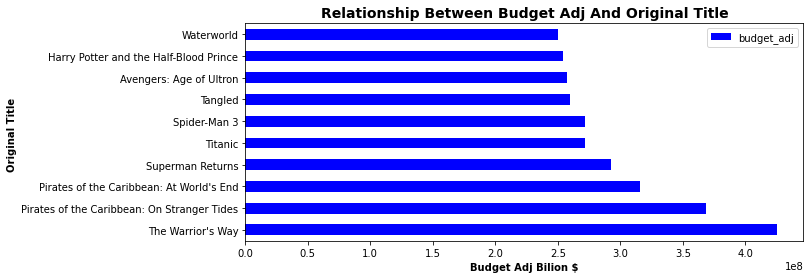

In [35]:
sorted_budget_adj = df['budget_adj'].sort_values(ascending=False)[:10] #filter of the budget_adj with sorting
df_profit_sorted = df.iloc[sorted_budget_adj.index] #get the data by apply sort function
myPlot(df=df_profit_sorted, xVar='original_title', yVar='budget_adj',xUnit='',yUnit='Bilion $', kind ='barh') #plot the data by using myPlot function with barh kind

from the above, the max profit movie is **Star Wars** then Avatar, and minimum profit movie is **The Warrior's Way** Althogh it the hightest budget cost in term of 2010 dollars<br>


### Q2: What is the effect of run time on profit of movies? 

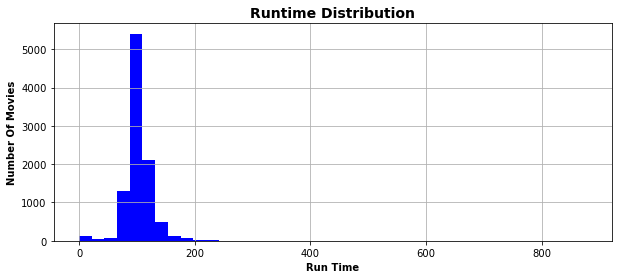

In [36]:
#study the distrubition of run time of the movise
myHist(df['runtime'],'Run Time', 'Number of Movies','Runtime distribution')

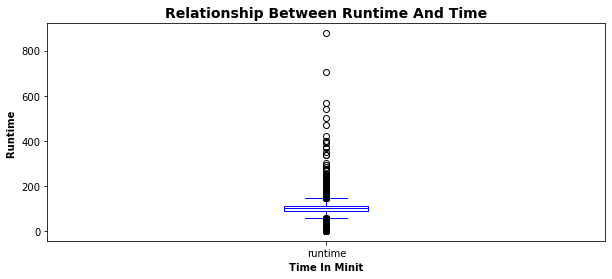

In [37]:
myPlot(df['runtime'],'Time', 'Runtime','in minit', '', kind='box') #plot the data by using myPlot function with barh kind

From the box ploting, the runtime contain high number of outerline that can be droped

In [38]:
# removal of outer line of runtimme
Q1= df.runtime.quantile(0.25)              #get the first quantile
Q3 = df.runtime.quantile(0.75)             #get the third quantile
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR               #get the upper limit
lower_limit = Q1 - 1.5 * IQR               #get the lower limit
df_runtime_filter = df[(df.runtime > lower_limit) & (df.runtime < upper_limit)] #filtering runtime data using the upper and lower limit

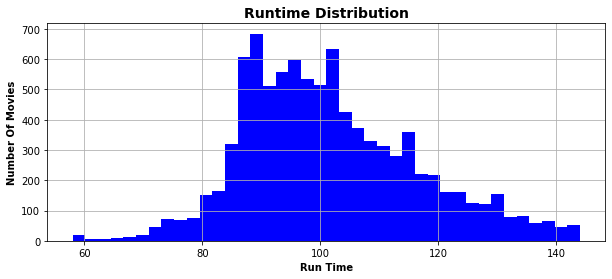

In [39]:
myHist(df_runtime_filter.runtime,'Run Time', 'Number of Movies','Runtime distribution') #plot hisgram for run time

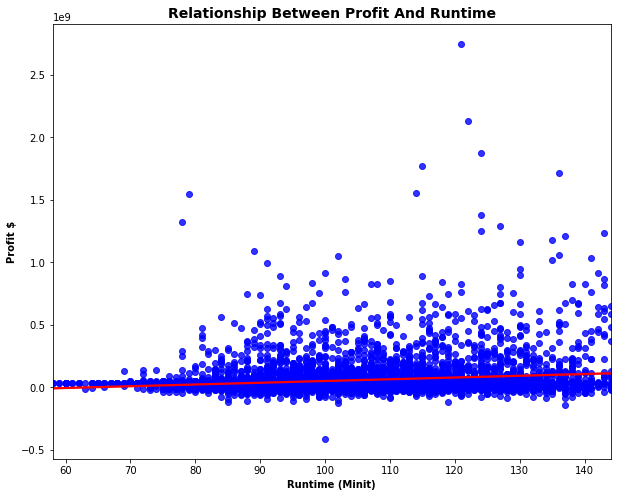

In [40]:
myReqPlot(df_runtime_filter,'runtime', 'profit', '(minit)', '$',scatter_color='blue', line_color='red') #plot linear regression plot between runtime and profit 

From the above there is no reletion between profit and runtime of the movies

### Q3. what the impact of popularity on the profit?

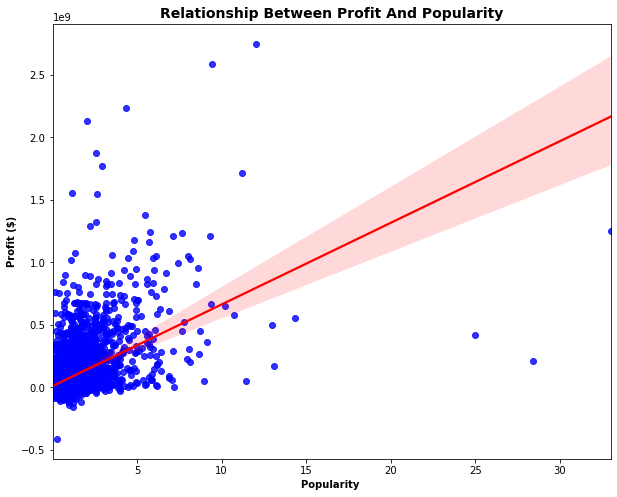

In [41]:
myReqPlot(df,'popularity', 'profit', "", '($)',scatter_color='blue', line_color='red') #plot linear regression plot between popularity and profit 

In [42]:
df.popularity.corr(df.profit)    #get the correlation value between popularity and profit

0.5338282903110242

from the above, there are a postive relation between popularity and profit

### Q4. what the impact of budget on the profit?

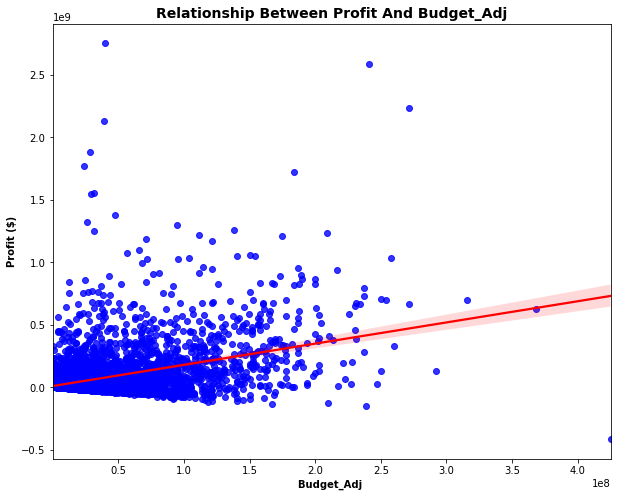

In [43]:
myReqPlot(df,'budget_adj', 'profit', "", '($)',scatter_color='blue', line_color='red') #plot linear regression plot between popularity and profit 
#sns.regplot(x=df['budget_adj'],y=df['profit'],color='blue');

In [44]:
df.budget_adj.corr(df.profit) #get the correlation value between budget and profit

0.426399862376022

### Q 6. Which months have high profit?

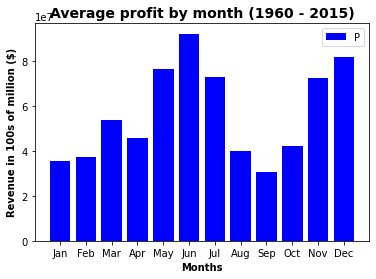

In [45]:

df['release_month']=df['release_date'].dt.month                                      # create month column 
df_profit_by_month = df.groupby('release_month')['profit'].mean()                    #goup the relase month by profit
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']     #make a list of months

plt.bar(np.arange(0, 12), df_profit_by_month, tick_label = months,color='blue' );   #plot bar of profit by month
plt.title('Average profit by month (1960 - 2015)',fontsize=14, weight="bold");      #set the title of plot
plt.ylabel('Revenue in 100s of million ($)',fontsize = 10, weight='bold');          #set y label
plt.xlabel('Months',fontsize = 10, weight='bold');                                  #set x label
plt.legend('Profit');                                                               #set legand

### genres

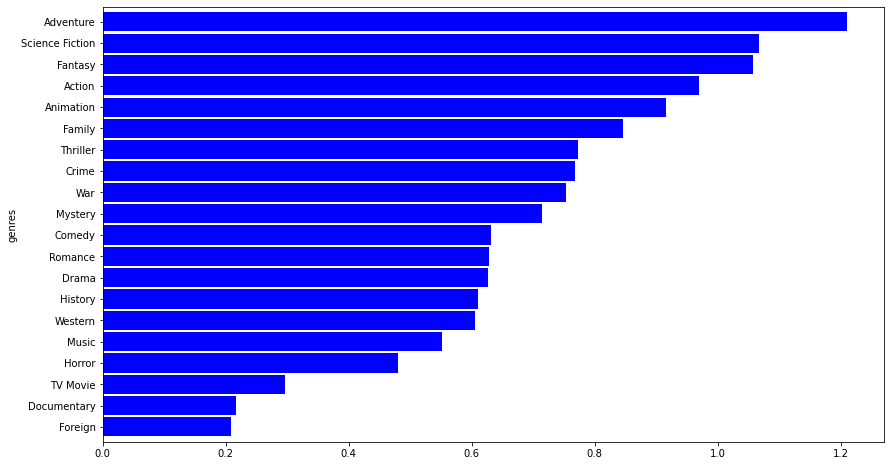

In [46]:
df_genres = extract_data(df,'genres')                  #extract data of genres column
df_genres.groupby('genres').popularity.mean().sort_values(ascending=True).plot.barh(color='blue',figsize=(14,8),rot=0,width=0.9);  #plot genres vs popularity mean

From above figure the most popular genre is Adventure then Science fiction and Fantasy, and the lower on is Foreign

<a id='conclusions'></a>
## Conclusions
Studing of The TMDb movie dataset as follow: <br>
1- Data Wrangling, By removing null values, duplicated values and 0 values for more accurate results.<br>
then converting datatypes of release date and year to datetime dtype for further analysis.<br>
and adding new column "profit" from budget and revenue data acccording to 2010 dollars.<br>

2- Explatory Data Analysi, by using Visualization figures lik line plot, bar chart, scatter plots and histogram, it show the top profit movies, hightest budget movies.<br>
- The max profit movie is Star Wars then Avatar
- Minimum profit movie is The Warrior's Way Althogh it the hightest budget cost in term of 2010 dollars
- There is an impact of popularity on the profit with postive relation.
- There is no impact of run time on the profite.
- There is a little impact of budget on profit with low postive relation
- Summer months(May to july), Nov, Dec have high mean movie profit, June month have high mean movie profit. 
- The most popular genre is Adventure then Science fiction and Fantasy, and the lower on is Foreign

### Limitation: 
Although we successfully predicted the above properties on TMDb movie dataset, there are a lot of missing information, such as rows containing 0 values and null values. The dataset was cut by few thousand rows of movies, which would definitely affect the result. Also, every movie received a different number of votes. Therefore, movies with fewer votes or higher votes would not be accurate. In order to make the data useful for analysis, there should be a consistent method for collecting information.
